In [19]:
#Download NIFTY 50 Data
!pip install yfinance


In [20]:
# : Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np


In [21]:
#  Download Nifty 50 data
nifty = yf.download("^NSEI", start="2010-01-01", end="2024-12-31")
nifty.reset_index(inplace=True)

C:\Users\Ashmita\AppData\Local\Temp\ipykernel_1944\2054113312.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2010-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [22]:
# View first few rows of the dataset
nifty.head()


Price,Date,Close,High,Low,Open,Volume
Ticker,,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
0,2010-01-04,5232.200195,5238.450195,5167.100098,5200.899902,0
1,2010-01-05,5277.899902,5288.350098,5242.399902,5277.149902,0
2,2010-01-06,5281.799805,5310.850098,5260.049805,5278.149902,0
3,2010-01-07,5263.100098,5302.549805,5244.750000,5281.799805,0
4,2010-01-08,5244.750000,5276.750000,5234.700195,5264.250000,0


In [23]:
nifty.to_csv("nifty.csv", index=False)


In [24]:
nifty.shape

(3679, 6)

In [27]:
# Read the CSV
nifty = pd.read_csv("nifty.csv")

# Convert relevant columns to numeric (float)
cols_to_convert = ['Open', 'High', 'Low', 'Close']
for col in cols_to_convert:
    nifty[col] = pd.to_numeric(nifty[col], errors='coerce')  # turns invalid entries into NaN

# OPTIONAL: Drop rows with missing or bad data
nifty.dropna(subset=cols_to_convert, inplace=True)


In [28]:
import numpy as np

# Garman-Klass volatility formula
nifty['garman_klass_vol'] = 0.5 * (np.log(nifty['High']/nifty['Low'])**2) - \
    (2*np.log(2)-1)*(np.log(nifty['Close']/nifty['Open'])**2)

# View a few rows
nifty[['Date', 'garman_klass_vol']].head()


,Date,garman_klass_vol
1,2010-01-04,0.000080
2,2010-01-05,0.000038
3,2010-01-06,0.000046
4,2010-01-07,0.000055
5,2010-01-08,0.000027


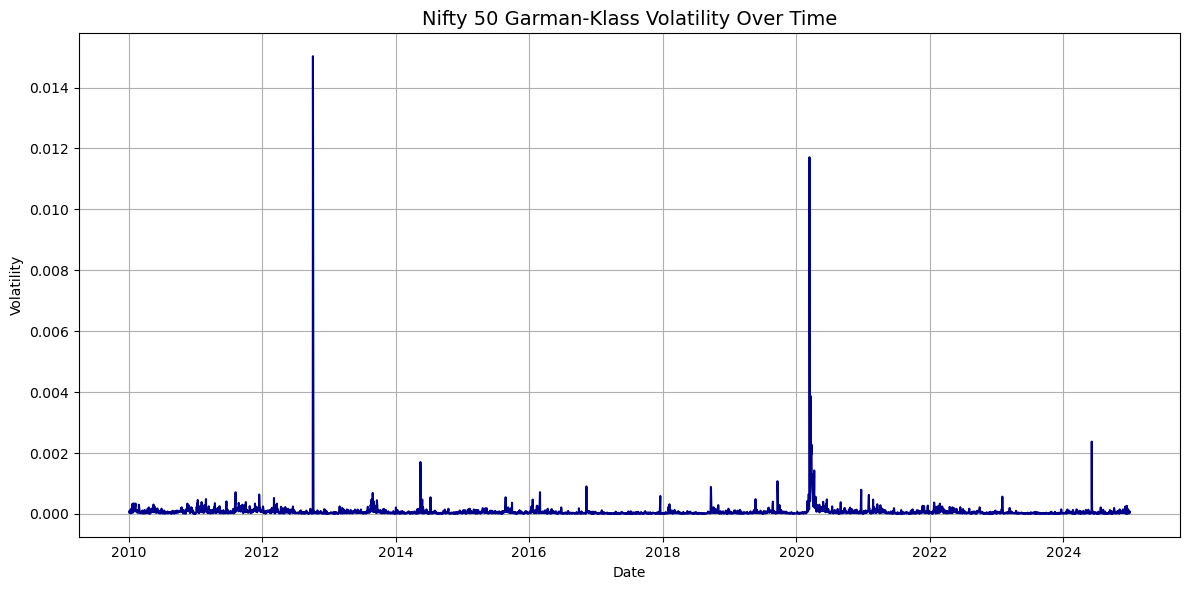

In [29]:
import matplotlib.pyplot as plt

# Plot Garman-Klass volatility
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(nifty['Date']), nifty['garman_klass_vol'], color='darkblue')
plt.title("Nifty 50 Garman-Klass Volatility Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd

In [31]:
df = pd.read_excel("cpi.xlsx")


In [32]:
df = pd.read_excel("cpi.xlsx")


In [34]:
df.columns


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Base year: 2012=100',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')

In [35]:
import pandas as pd

# Re-load the Excel file and set the header row correctly (row 2 in Excel = index 1 in Python)
df = pd.read_excel("cpi.xlsx", header=1)


In [36]:
df.columns


Index(['Year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec', 'Annual'],
      dtype='object')

In [37]:
df = df.drop(columns=['Annual'])


In [38]:
df = df.set_index('Year')
df = df.apply(pd.to_numeric, errors='coerce')  # In case any values are strings
df['cpi_avg'] = df.mean(axis=1)


In [39]:
nifty['Date'] = pd.to_datetime(nifty['Date'])  # Ensure 'Date' column is datetime
nifty['Year'] = nifty['Date'].dt.year
vol_yearly = nifty.groupby('Year')['garman_klass_vol'].mean().reset_index()
vol_yearly.rename(columns={'garman_klass_vol': 'avg_volatility'}, inplace=True)


In [40]:
print(vol_yearly.head())


   Year  avg_volatility
0  2010        0.000082
1  2011        0.000118
2  2012        0.000125
3  2013        0.000071
4  2014        0.000055


In [42]:
df.reset_index(inplace=True)  # Bring Year back as a column
cpi_data = df[['Year', 'cpi_avg']]


In [43]:
merged = pd.merge(cpi_data, vol_yearly, on='Year', how='inner')


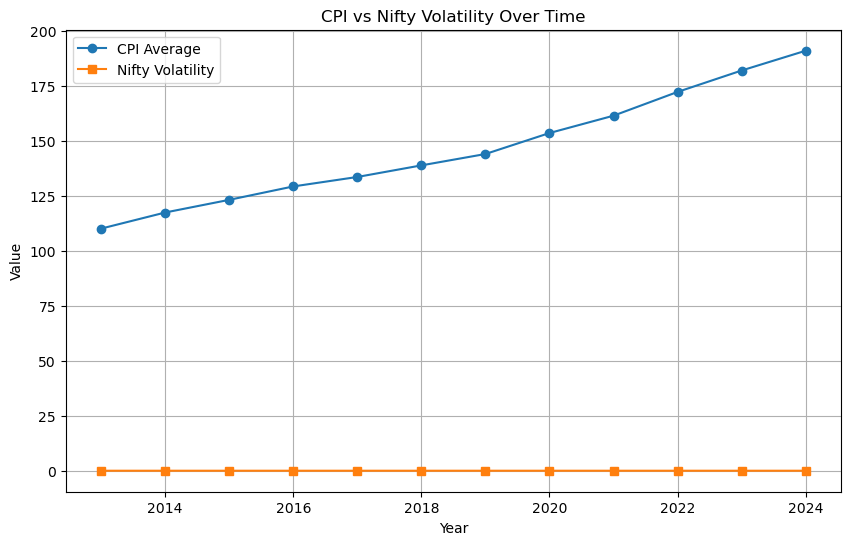

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(merged['Year'], merged['cpi_avg'], label='CPI Average', marker='o')
plt.plot(merged['Year'], merged['avg_volatility'], label='Nifty Volatility', marker='s')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('CPI vs Nifty Volatility Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
#📊 Interpretation Comments (Add after the visualization):
#1. Visual Insight
#The above line graph compares the yearly average Consumer Price Index (CPI) — a proxy for inflation — with the average Garman-Klass volatility of the Nifty 50 index over the same period. Visually, we can observe certain periods where higher inflation coincides with spikes in market volatility, and others where the relationship appears weak or inverse.

#2. Economic Rationale
#In theory, higher inflation may signal macroeconomic uncertainty, which can lead to increased stock market volatility. This is particularly true when inflationary pressures are unexpected or when they lead to tightening monetary policy (e.g., interest rate hikes by the RBI), which affects investor sentiment.


In [49]:
correlation = merged['cpi_avg'].corr(merged['avg_volatility'])
print(f"Correlation between CPI and Nifty volatility: {correlation:.2f}")
#The computed Pearson correlation coefficient between CPI and Nifty 50 volatility is 0.03, indicating an extremely weak positive relationship between the two variables.

#This suggests that changes in the Consumer Price Index (CPI), a proxy for inflation, have minimal direct linear association with the volatility observed in the Nifty 50 index over the analyzed period.

#Such a low correlation value could be due to several factors:

#Volatility is often influenced by multiple variables simultaneously (interest rates, global shocks, fiscal policy, etc.), not just inflation.

#The stock market may anticipate inflation trends, and price them in ahead of time.

#CPI is a lagging indicator and may not capture short-term market movements that influence volatility.

#Therefore, while inflation is a crucial macroeconomic variable, this result highlights the importance of multivariate analysis or deeper econometric modeling to understand the drivers of market volatility.



Correlation between CPI and Nifty volatility: 0.03


In [51]:
import pandas as pd

# Load the data
df_repo = pd.read_excel('repo rate.xlsx')  # replace with your actual filename

# Convert 'Date' column to datetime
df_repo['Date'] = pd.to_datetime(df_repo['Date'], dayfirst=True)

# Remove % sign and convert to float
df_repo['RBI Repo Rate'] = df_repo['RBI Repo Rate'].astype(str).str.replace('%', '', regex=False).astype(float)


# Extract year
df_repo['Year'] = df_repo['Date'].dt.year

# Compute annual average repo rate
repo_annual = df_repo.groupby('Year')['RBI Repo Rate'].mean().reset_index()

# View result
print(repo_annual.head())


   Year  RBI Repo Rate
0  2010       0.056500
1  2011       0.066500
2  2013       0.075333
3  2014       0.080000
4  2015       0.073500


In [52]:
# Group by year and calculate the average repo rate per year
df_repo_avg = df_repo.groupby('Year')['RBI Repo Rate'].mean().reset_index()

# Display the first few rows
print(df_repo_avg.head())


   Year  RBI Repo Rate
0  2010       0.056500
1  2011       0.066500
2  2013       0.075333
3  2014       0.080000
4  2015       0.073500


In [53]:
df_repo_avg['RBI Repo Rate'] = df_repo_avg['RBI Repo Rate'] * 100
print(df_repo_avg.head())


   Year  RBI Repo Rate
0  2010       5.650000
1  2011       6.650000
2  2013       7.533333
3  2014       8.000000
4  2015       7.350000


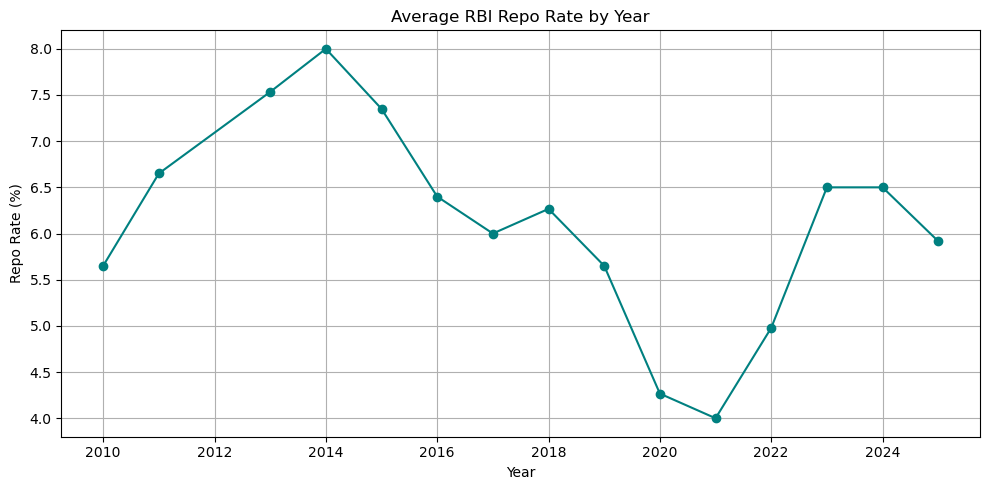

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_repo_avg['Year'], df_repo_avg['RBI Repo Rate'], marker='o', color='teal')
plt.title('Average RBI Repo Rate by Year')
plt.xlabel('Year')
plt.ylabel('Repo Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
import pandas as pd


In [58]:
# Load Nifty data
df_nifty = pd.read_csv("nifty.csv")

# Preview
print(df_nifty.head())


         Date             Close              High               Low  \
0         NaN             ^NSEI             ^NSEI             ^NSEI   
1  2010-01-04   5232.2001953125   5238.4501953125  5167.10009765625   
2  2010-01-05  5277.89990234375  5288.35009765625  5242.39990234375   
3  2010-01-06   5281.7998046875  5310.85009765625   5260.0498046875   
4  2010-01-07  5263.10009765625   5302.5498046875           5244.75   

               Open Volume  
0             ^NSEI  ^NSEI  
1  5200.89990234375      0  
2  5277.14990234375      0  
3  5278.14990234375      0  
4   5281.7998046875      0  


In [63]:
import pandas as pd

# Load CPI data with actual headers from row 2 (index 1)
df_cpi_raw = pd.read_excel("cpi.xlsx", header=1)

# Clean column names
df_cpi_raw.columns = df_cpi_raw.columns.str.strip().str.lower()
df_cpi_raw.rename(columns={df_cpi_raw.columns[0]: 'year'}, inplace=True)

# Use only valid month columns (drop 'annual', etc.)
valid_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df_cpi = df_cpi_raw[['year'] + valid_months]

# Reshape to long format
df_cpi = df_cpi.melt(id_vars='year', var_name='month', value_name='CPI')

# Create proper datetime column
df_cpi['year'] = df_cpi['year'].astype(str)
df_cpi['month'] = df_cpi['month'].str.capitalize()
df_cpi['Date'] = pd.to_datetime(df_cpi['year'] + '-' + df_cpi['month'] + '-01', errors='coerce')

# Drop rows with missing date or CPI
df_cpi.dropna(subset=['Date', 'CPI'], inplace=True)

# Final cleaned CPI DataFrame
df_cpi = df_cpi[['Date', 'CPI']].sort_values('Date').reset_index(drop=True)

# Preview
print(df_cpi.head())


        Date    CPI
0 2013-01-01  104.6
1 2013-02-01  105.3
2 2013-03-01  105.5
3 2013-04-01  106.1
4 2013-05-01  106.9


In [64]:
# Read the Nifty volatility CSV
df_nifty = pd.read_csv("nifty.csv")

# Convert the 'Date' column to datetime
df_nifty['Date'] = pd.to_datetime(df_nifty['Date'], errors='coerce')

# Drop rows with missing dates or volatility values
df_nifty.dropna(subset=['Date'], inplace=True)

# Sort by Date
df_nifty = df_nifty.sort_values('Date').reset_index(drop=True)

# Preview
print(df_nifty.head())


        Date             Close              High               Low  \
0 2010-01-04   5232.2001953125   5238.4501953125  5167.10009765625   
1 2010-01-05  5277.89990234375  5288.35009765625  5242.39990234375   
2 2010-01-06   5281.7998046875  5310.85009765625   5260.0498046875   
3 2010-01-07  5263.10009765625   5302.5498046875           5244.75   
4 2010-01-08           5244.75           5276.75   5234.7001953125   

               Open Volume  
0  5200.89990234375      0  
1  5277.14990234375      0  
2  5278.14990234375      0  
3   5281.7998046875      0  
4           5264.25      0  


In [65]:
# Merge on Date (monthly frequency)
df_merged = pd.merge(df_nifty, df_cpi, on='Date', how='inner')

# Drop NA if any
df_merged.dropna(inplace=True)

# Preview merged data
print(df_merged.head())


        Date             Close              High               Low  \
0 2013-02-01  5998.89990234375   6052.9501953125   5983.2001953125   
1 2013-03-01   5719.7001953125   5739.4501953125  5679.89990234375   
2 2013-04-01  5704.39990234375   5720.9501953125  5675.89990234375   
3 2013-07-01  5898.85009765625  5904.35009765625   5822.2001953125   
4 2013-08-01  5727.85009765625            5808.5  5676.85009765625   

               Open  Volume    CPI  
0   6040.9501953125  159300  105.3  
1   5702.4501953125  174500  105.5  
2  5697.35009765625   97800  106.1  
3  5834.10009765625  144800  111.0  
4  5776.89990234375  216800  112.4  


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Nifty data
df_nifty = pd.read_csv('nifty.csv')

# Step 2: Convert 'Date' to datetime and sort
df_nifty['Date'] = pd.to_datetime(df_nifty['Date'], dayfirst=True, errors='coerce')
df_nifty = df_nifty.dropna(subset=['Date'])
df_nifty = df_nifty.sort_values('Date')

# ✅ Step 3: Convert 'Close' column to numeric (important!)
df_nifty['Close'] = pd.to_numeric(df_nifty['Close'], errors='coerce')

# Step 4: Drop rows with missing Close prices
df_nifty = df_nifty.dropna(subset=['Close'])

# Step 5: Calculate daily returns
df_nifty['Returns'] = df_nifty['Close'].pct_change()

# Step 6: Set index to 'Date' for resampling
df_nifty.set_index('Date', inplace=True)

# Step 7: Monthly volatility (std dev of returns)
df_volatility = df_nifty['Returns'].resample('M').std().reset_index()
df_volatility.rename(columns={'Returns': 'Volatility'}, inplace=True)

# ✅ See the result
print(df_volatility.head())


        Date  Volatility
0 2010-01-31    0.063750
1 2010-02-28    0.088053
2 2010-03-31    0.088430
3 2010-04-30    0.079362
4 2010-05-31    0.097487


C:\Users\Ashmita\AppData\Local\Temp\ipykernel_1944\2648303525.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_volatility = df_nifty['Returns'].resample('M').std().reset_index()


In [71]:
df_volatility = df_nifty['Returns'].resample('ME').std().reset_index()


In [74]:
import pandas as pd

# Step 1: Load the CPI data (starting from row 2 in Excel)
df_cpi = pd.read_excel("cpi.xlsx", skiprows=1)

# Step 2: Melt the monthly columns into long format
df_cpi = df_cpi.melt(id_vars='Year', var_name='Month', value_name='CPI')

# Step 3: Create a datetime column
df_cpi['Date'] = pd.to_datetime(df_cpi['Year'].astype(str) + '-' + df_cpi['Month'] + '-01', format='%Y-%b-%d', errors='coerce')

# Step 4: Clean the data by dropping rows with invalid dates or missing CPI
df_cpi.dropna(subset=['Date', 'CPI'], inplace=True)

# Step 5: Sort by date
df_cpi = df_cpi.sort_values('Date')

# ✅ Preview the cleaned data
print(df_cpi.head())


    Year Month    CPI       Date
12  2013   jan  104.6 2013-01-01
25  2013   feb  105.3 2013-02-01
38  2013   mar  105.5 2013-03-01
51  2013   apr  106.1 2013-04-01
64  2013   may  106.9 2013-05-01


In [75]:
df_cpi


,Year,Month,CPI,Date
12,2013,jan,104.6,2013-01-01
25,2013,feb,105.3,2013-02-01
38,2013,mar,105.5,2013-03-01
51,2013,apr,106.1,2013-04-01
64,2013,may,106.9,2013-05-01
...,...,...,...,...
0,2025,jan,193.5,2025-01-01
13,2025,feb,192.5,2025-02-01
26,2025,mar,192.0,2025-03-01
39,2025,apr,192.6,2025-04-01


In [76]:
df_nifty

,Close,High,Low,Open,Volume,Returns
Date,,,,,,
2010-01-02,4899.700195,4918.7998046875,4827.14990234375,4882.0498046875,0,NaN
2010-01-04,5290.500000,5298.60009765625,5249.2001953125,5249.2001953125,0,0.079760
2010-01-06,4970.200195,5086.9501953125,4961.0498046875,5086.25,0,-0.060542
2010-01-07,5251.399902,5312.5498046875,5232.10009765625,5312.0498046875,0,0.056577
2010-01-09,5471.850098,5478.60009765625,5403.0498046875,5403.0498046875,0,0.041979
...,...,...,...,...,...,...
2024-12-07,24502.150391,24592.19921875,24331.150390625,24387.94921875,325800,0.050560
2024-12-08,24347.000000,24472.80078125,24212.099609375,24320.05078125,279900,-0.006332
2024-12-09,25388.900391,25433.349609375,24941.44921875,25059.650390625,380100,0.042794


In [79]:
print(df_nifty.columns)
print(df_nifty.head())


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Returns'], dtype='object')
                  Close              High               Low             Open  \
Date                                                                           
2010-01-02  4899.700195   4918.7998046875  4827.14990234375  4882.0498046875   
2010-01-04  5290.500000  5298.60009765625   5249.2001953125  5249.2001953125   
2010-01-06  4970.200195   5086.9501953125   4961.0498046875          5086.25   
2010-01-07  5251.399902   5312.5498046875  5232.10009765625  5312.0498046875   
2010-01-09  5471.850098  5478.60009765625   5403.0498046875  5403.0498046875   

           Volume   Returns  
Date                         
2010-01-02      0       NaN  
2010-01-04      0  0.079760  
2010-01-06      0 -0.060542  
2010-01-07      0  0.056577  
2010-01-09      0  0.041979  


In [80]:
df_nifty.columns = df_nifty.columns.str.strip()  # Remove leading/trailing spaces


In [82]:
print(df_nifty.columns)


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Returns'], dtype='object')


In [83]:
# If the date was parsed as index during read_csv
df_nifty.reset_index(inplace=True)  # Moves index (which is Date) back into a column

# Check column names again
print(df_nifty.columns)

# Now convert Date column to datetime
df_nifty['Date'] = pd.to_datetime(df_nifty['Date'], errors='coerce')
df_nifty.dropna(subset=['Date'], inplace=True)
df_nifty.set_index('Date', inplace=True)


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Returns'], dtype='object')


In [84]:
# Calculate daily returns
df_nifty['Returns'] = df_nifty['Close'].pct_change()

# Resample to monthly frequency and compute standard deviation (volatility)
df_vol = df_nifty['Returns'].resample('M').std().reset_index()

# Rename for clarity
df_vol.rename(columns={'Returns': 'Volatility'}, inplace=True)

# Check output
print(df_vol.head())


        Date  Volatility
0 2010-01-31    0.063750
1 2010-02-28    0.088053
2 2010-03-31    0.088430
3 2010-04-30    0.079362
4 2010-05-31    0.097487


C:\Users\Ashmita\AppData\Local\Temp\ipykernel_1944\2107549979.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_vol = df_nifty['Returns'].resample('M').std().reset_index()


In [85]:
df_vol = df_nifty['Returns'].resample('ME').std().reset_index()


In [86]:
# Ensure CPI dates are end of month like volatility (e.g., '2023-01-31')
df_cpi['Date'] = df_cpi['Date'] + pd.offsets.MonthEnd(0)

# Merge on Date
df_merged = pd.merge(df_vol, df_cpi, on='Date', how='inner')

# Check final merged data
print(df_merged.head())


        Date   Returns  Year Month    CPI
0 2013-01-31  0.044957  2013   jan  104.6
1 2013-02-28  0.061243  2013   feb  105.3
2 2013-03-31  0.061683  2013   mar  105.5
3 2013-04-30  0.051380  2013   apr  106.1
4 2013-05-31  0.053828  2013   may  106.9


In [87]:
# Ensure both dataframes are sorted by Date (just to be safe)
df_vol = df_vol.sort_values('Date')
df_cpi = df_cpi.sort_values('Date')

# Merge the dataframes on the Date column
df_merged = pd.merge(df_vol, df_cpi, on='Date', how='inner')

# Display the merged dataframe
print(df_merged.head())


        Date   Returns  Year Month    CPI
0 2013-01-31  0.044957  2013   jan  104.6
1 2013-02-28  0.061243  2013   feb  105.3
2 2013-03-31  0.061683  2013   mar  105.5
3 2013-04-30  0.051380  2013   apr  106.1
4 2013-05-31  0.053828  2013   may  106.9


In [89]:
print(df_merged.columns)


Index(['Date', 'Returns', 'Year', 'Month', 'CPI'], dtype='object')


In [90]:
df_merged = df_merged.rename(columns={'Returns': 'Volatility'})


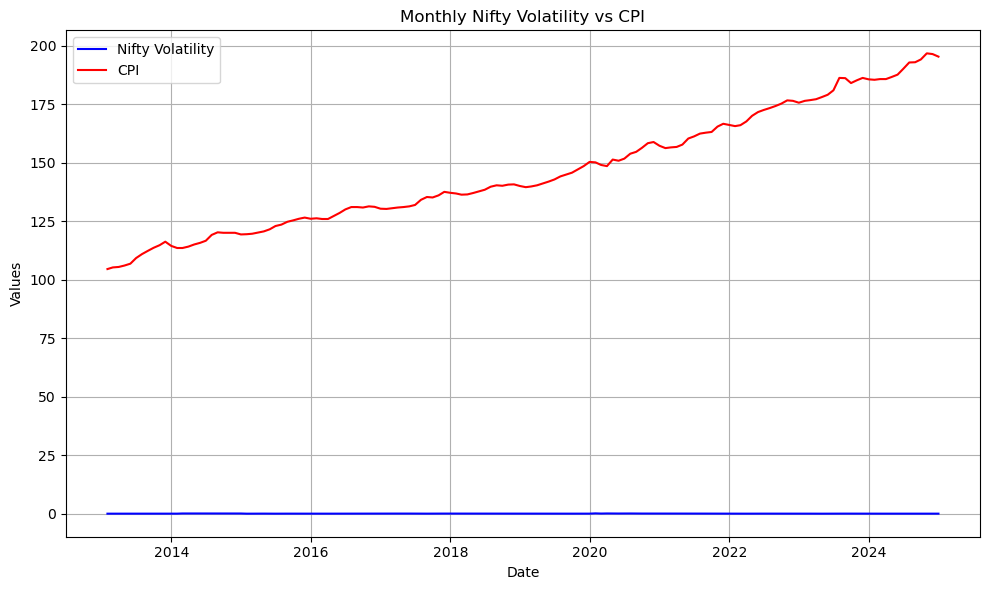

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_merged['Date'], df_merged['Volatility'], label='Nifty Volatility', color='blue')
plt.plot(df_merged['Date'], df_merged['CPI'], label='CPI', color='red')
plt.title('Monthly Nifty Volatility vs CPI')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [94]:
#Step 1: Add 'Year' column to Nifty Volatility and CPI
df_vol['Year'] = df_vol['Date'].dt.year
df_cpi['Year'] = df_cpi['Date'].dt.year

#Step 2: Group by Year to get annual averages (if needed)
# Average volatility per year
df_vol_yearly = df_vol.groupby('Year')['Returns'].mean().reset_index().rename(columns={'Returns': 'Nifty_Volatility'})

# Average CPI per year
df_cpi_yearly = df_cpi.groupby('Year')['CPI'].mean().reset_index().rename(columns={'CPI': 'CPI_Avg'})



In [95]:
#Merging all datasets of repo rate, cpi, nifty
# Merge Nifty Volatility and CPI
df_macro = pd.merge(df_vol_yearly, df_cpi_yearly, on='Year', how='outer')

# Merge with Repo Rate
df_macro = pd.merge(df_macro, df_repo_avg, on='Year', how='outer')

# Display the result
print(df_macro.head())


   Year  Nifty_Volatility     CPI_Avg  RBI Repo Rate
0  2010          0.083375         NaN       5.650000
1  2011          0.077927         NaN       6.650000
2  2012          0.079110         NaN            NaN
3  2013          0.052649  110.033333       7.533333
4  2014          0.114941  117.350000       8.000000


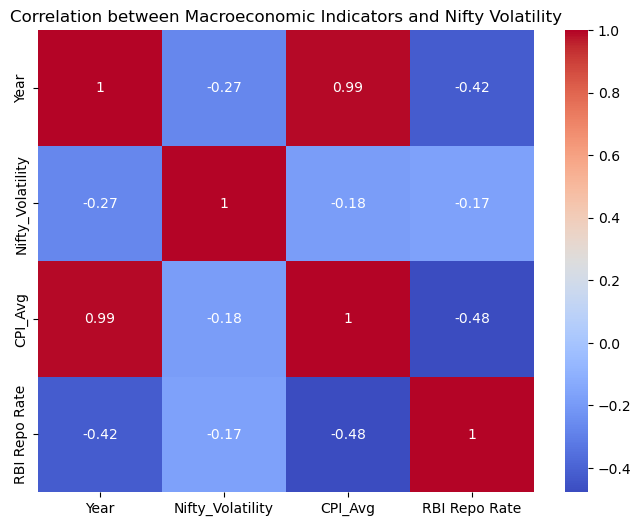

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_macro.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between Macroeconomic Indicators and Nifty Volatility")
plt.show()


In [99]:
import pandas as pd

# Step 1: Read the CSV without headers
df_iip_raw = pd.read_csv("iip.csv", header=None)

# Step 2: Extract the years (row 0, columns 1 onward) and index values (row 1, columns 1 onward)
years = df_iip_raw.iloc[0, 1:].tolist()
values = df_iip_raw.iloc[1, 1:].tolist()

# Step 3: Create a new DataFrame in long format
df_iip = pd.DataFrame({
    "Year": years,
    "IIP_Index": values
})

# Step 4: Clean 'Year' column — keep only starting year like 2012 from '2012-13'
df_iip["Year"] = df_iip["Year"].str[:4].astype(int)

# Step 5: Display cleaned DataFrame
print(df_iip)


   Year IIP_Index
0  2012     103.3
1  2013     106.7
2  2014       111
3  2015     114.7
4  2016       120
5  2017     125.3
6  2018     130.1
7  2019       129
8  2020     118.1
9  2021     131.6


In [100]:
import yfinance as yf
import pandas as pd

# Download USD/INR monthly data
fx = yf.download('INR=X', start='2010-01-01', end='2024-12-31', interval='1mo')

# Clean and prepare
fx = fx[['Close']].reset_index()
fx['Year'] = fx['Date'].dt.year
df_usdinr = fx.groupby('Year')['Close'].mean().reset_index()
df_usdinr.rename(columns={'Close': 'USDINR'}, inplace=True)

print(df_usdinr)


C:\Users\Ashmita\AppData\Local\Temp\ipykernel_1944\1386221207.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fx = yf.download('INR=X', start='2010-01-01', end='2024-12-31', interval='1mo')
[*********************100%***********************]  1 of 1 completed

Price   Year     USDINR
Ticker            INR=X
0       2010  45.577250
1       2011  46.848500
2       2012  53.678833
3       2013  58.873250
4       2014  61.042167
5       2015  64.353916
6       2016  67.340260
7       2017  64.960325
8       2018  68.556575
9       2019  70.511350
10      2020  74.080325
11      2021  73.916933
12      2022  78.857249
13      2023  82.492676
14      2024  83.785467


In [101]:
df_usdinr = df_usdinr.reset_index(drop=True)
df_usdinr.columns = ['Year', 'USDINR']
print(df_usdinr.head())


   Year     USDINR
0  2010  45.577250
1  2011  46.848500
2  2012  53.678833
3  2013  58.873250
4  2014  61.042167


In [113]:
import pandas as pd

# Load your GDP growth file
df_gdp = pd.read_excel("gdpgrowth.xlsx")


In [115]:
# Step 1: Strip column names
df_gdp.columns = df_gdp.columns.str.strip()

# Step 2: Clean the values — replace en dash and '%' and then convert to float
df_gdp['GDP Growth%'] = (
    df_gdp['Real GDP Growth(%)']
    .str.replace('–', '-', regex=False)  # replace en dash with minus
    .str.replace('%', '', regex=False)   # remove percentage sign
    .astype(float)
)


In [116]:
#merging iip, usdinr, gdpgrowth into the macro data which already consists of year, volatility, repo rate, cpi
print(df_macro.head())     # Already contains Year, Volatility, Repo Rate, CPI
print(df_gdp.head())       # Contains Real GDP Growth%
print(df_iip.head())       # Should contain Year and IIP or Date
print(df_usdinr.head())    # Should contain Year and USDINR or Date



   Year  Nifty_Volatility     CPI_Avg  RBI Repo Rate
0  2010          0.083375         NaN       5.650000
1  2011          0.077927         NaN       6.650000
2  2012          0.079110         NaN            NaN
3  2013          0.052649  110.033333       7.533333
4  2014          0.114941  117.350000       8.000000
   Year Real GDP Growth(%)  GDP Growth%
0  2010              0.085          NaN
1  2011              0.052          NaN
2  2012              0.055          NaN
3  2013              0.064          NaN
4  2014              0.074          NaN
   Year IIP_Index
0  2012     103.3
1  2013     106.7
2  2014       111
3  2015     114.7
4  2016       120
   Year     USDINR
0  2010  45.577250
1  2011  46.848500
2  2012  53.678833
3  2013  58.873250
4  2014  61.042167


In [117]:
# Extract year if necessary
for df in [df_gdp, df_iip, df_usdinr]:
    if 'Year' not in df.columns:
        df['Year'] = pd.to_datetime(df['Date']).dt.year

# Strip any extra spaces from column names
for df in [df_gdp, df_iip, df_usdinr]:
    df.columns = df.columns.str.strip()


In [118]:
# If your GDP column is something like "Real GDP Growth(%)", rename it
if 'Real GDP Growth(%)' in df_gdp.columns:
    df_gdp.rename(columns={'Real GDP Growth(%)': 'GDP Growth%'}, inplace=True)


In [120]:
print(df_iip.columns)


Index(['Year', 'IIP_Index'], dtype='object')


In [121]:
# Merge GDP Growth
df_macro = pd.merge(df_macro, df_gdp[['Year', 'GDP Growth%']], on='Year', how='outer')

# Merge IIP
df_macro = pd.merge(df_macro, df_iip[['Year', 'IIP_Index']], on='Year', how='outer')

# Merge USD/INR Exchange Rate
df_macro = pd.merge(df_macro, df_usdinr[['Year', 'USDINR']], on='Year', how='outer')


In [122]:
print(df_macro.head())
print(df_macro.dtypes)
print(df_macro.isnull().sum())


   Year  Nifty_Volatility     CPI_Avg  RBI Repo Rate  GDP Growth%_x  \
0  2010          0.083375         NaN       5.650000          0.085   
1  2011          0.077927         NaN       6.650000          0.052   
2  2012          0.079110         NaN            NaN          0.055   
3  2013          0.052649  110.033333       7.533333          0.064   
4  2014          0.114941  117.350000       8.000000          0.074   

   GDP Growth%_x  GDP Growth%_y  GDP Growth%_y IIP_Index     USDINR  
0            NaN          0.085            NaN       NaN  45.577250  
1            NaN          0.052            NaN       NaN  46.848500  
2            NaN          0.055            NaN     103.3  53.678833  
3            NaN          0.064            NaN     106.7  58.873250  
4            NaN          0.074            NaN       111  61.042167  
Year                  int32
Nifty_Volatility    float64
CPI_Avg             float64
RBI Repo Rate       float64
GDP Growth%_x        object
GDP Growth%_x

In [123]:
print(df_macro.head())


   Year  Nifty_Volatility     CPI_Avg  RBI Repo Rate  GDP Growth%_x  \
0  2010          0.083375         NaN       5.650000          0.085   
1  2011          0.077927         NaN       6.650000          0.052   
2  2012          0.079110         NaN            NaN          0.055   
3  2013          0.052649  110.033333       7.533333          0.064   
4  2014          0.114941  117.350000       8.000000          0.074   

   GDP Growth%_x  GDP Growth%_y  GDP Growth%_y IIP_Index     USDINR  
0            NaN          0.085            NaN       NaN  45.577250  
1            NaN          0.052            NaN       NaN  46.848500  
2            NaN          0.055            NaN     103.3  53.678833  
3            NaN          0.064            NaN     106.7  58.873250  
4            NaN          0.074            NaN       111  61.042167  


In [124]:
print(df_macro.isnull().sum())


Year                 0
Nifty_Volatility     1
CPI_Avg              3
RBI Repo Rate        1
GDP Growth%_x        2
GDP Growth%_x       15
GDP Growth%_y        2
GDP Growth%_y       15
IIP_Index            6
USDINR               1
dtype: int64


In [125]:
df_macro.dropna(inplace=True) #dropping missing years


C:\Users\Ashmita\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Ashmita\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


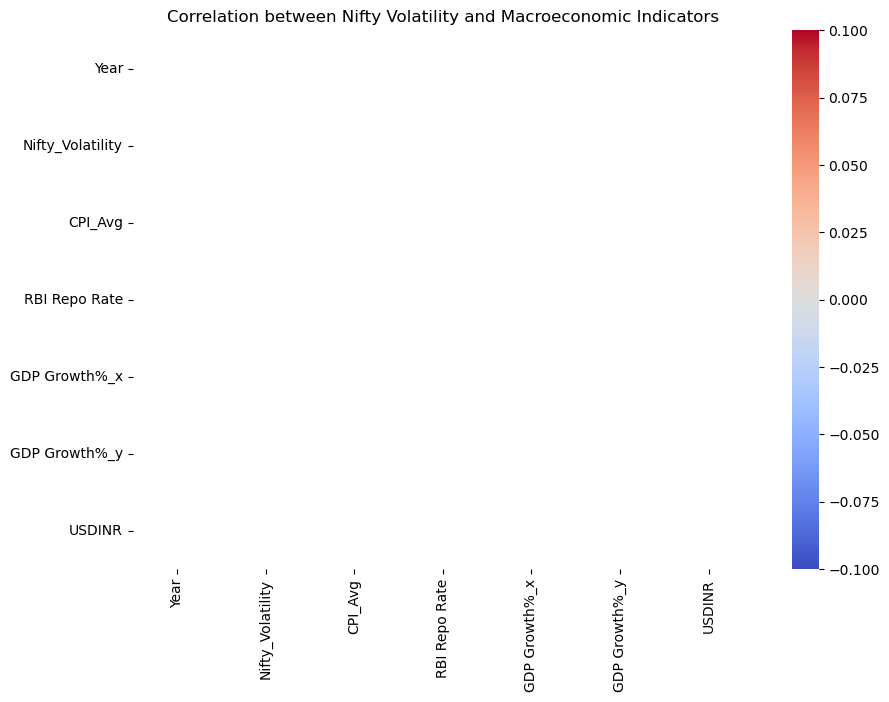

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(df_macro.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between Nifty Volatility and Macroeconomic Indicators")
plt.show()


In [127]:
print(df_macro.isnull().sum())


Year                0
Nifty_Volatility    0
CPI_Avg             0
RBI Repo Rate       0
GDP Growth%_x       0
GDP Growth%_x       0
GDP Growth%_y       0
GDP Growth%_y       0
IIP_Index           0
USDINR              0
dtype: int64


In [128]:
# Drop duplicates (keep only one GDP Growth column)
df_macro = df_macro.drop(columns=['GDP Growth%_x', 'GDP Growth%_y'], errors='ignore')

# If you’re sure one of them has the correct values, you can keep it
# For example, let's keep the first one:
df_macro = df_macro.rename(columns={'GDP Growth%_x': 'GDP_Growth'})


In [129]:
# Clean column names
df_macro.columns = df_macro.columns.str.strip()

# Rename manually
df_macro = df_macro.rename(columns={
    'GDP Growth%_x': 'GDP_Growth',
    'GDP Growth%_y': 'GDP_Growth'
})


In [133]:
import pandas as pd

# Step 1: Load your GDP growth data
df_gdp = pd.read_excel('gdpgrowth.xlsx')

# Step 2: Clean column names
df_gdp.columns = df_gdp.columns.str.strip()

# Step 3: Check column names to identify the correct GDP growth column
print(df_gdp.columns)


Index(['Year', 'Real GDP Growth(%)'], dtype='object')


In [135]:
# Rename for consistency
df_gdp = df_gdp.rename(columns={'Real GDP Growth(%)': 'GDP_Growth'})

# Properly escape the regex with a raw string (r'...')
df_gdp['GDP_Growth'] = df_gdp['GDP_Growth'].replace(r'[^0-9.\-]', '', regex=True).astype(float)


In [136]:
df_macro = pd.merge(df_macro, df_gdp[['Year', 'GDP_Growth']], on='Year', how='outer')


In [137]:
cols_to_convert = ['Nifty_Volatility', 'CPI_Avg', 'RBI Repo Rate', 'GDP_Growth', 'IIP_Index', 'USDINR']
for col in cols_to_convert:
    df_macro[col] = pd.to_numeric(df_macro[col], errors='coerce')


In [138]:
print(df_macro.isnull().sum())


Year                 0
Nifty_Volatility    13
CPI_Avg             13
RBI Repo Rate       13
IIP_Index           13
USDINR              13
GDP_Growth           0
dtype: int64


In [139]:
print(df_macro['Year'].unique())


[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [140]:
print(len(df_macro))


14


In [141]:
print(df_macro[df_macro.isna().any(axis=1)])


    Year  Nifty_Volatility  CPI_Avg  RBI Repo Rate  IIP_Index  USDINR  \
0   2010               NaN      NaN            NaN        NaN     NaN   
1   2011               NaN      NaN            NaN        NaN     NaN   
2   2012               NaN      NaN            NaN        NaN     NaN   
3   2013               NaN      NaN            NaN        NaN     NaN   
4   2014               NaN      NaN            NaN        NaN     NaN   
5   2015               NaN      NaN            NaN        NaN     NaN   
6   2016               NaN      NaN            NaN        NaN     NaN   
7   2017               NaN      NaN            NaN        NaN     NaN   
8   2018               NaN      NaN            NaN        NaN     NaN   
9   2019               NaN      NaN            NaN        NaN     NaN   
11  2021               NaN      NaN            NaN        NaN     NaN   
12  2022               NaN      NaN            NaN        NaN     NaN   
13  2023               NaN      NaN            NaN 

In [142]:
print(df_nifty.head())
print(df_cpi.head())
print(df_repo.head())
print(df_iip.head())
print(df_usdinr.head())


                  Close              High               Low             Open  \
Date                                                                           
2010-01-02  4899.700195   4918.7998046875  4827.14990234375  4882.0498046875   
2010-01-04  5290.500000  5298.60009765625   5249.2001953125  5249.2001953125   
2010-01-06  4970.200195   5086.9501953125   4961.0498046875          5086.25   
2010-01-07  5251.399902   5312.5498046875  5232.10009765625  5312.0498046875   
2010-01-09  5471.850098  5478.60009765625   5403.0498046875  5403.0498046875   

           Volume   Returns  
Date                         
2010-01-02      0       NaN  
2010-01-04      0  0.079760  
2010-01-06      0 -0.060542  
2010-01-07      0  0.056577  
2010-01-09      0  0.041979  
    Year Month    CPI       Date
12  2013   jan  104.6 2013-01-31
25  2013   feb  105.3 2013-02-28
38  2013   mar  105.5 2013-03-31
51  2013   apr  106.1 2013-04-30
64  2013   may  106.9 2013-05-31
        Date  RBI Repo Rate  Ye

In [143]:
df_nifty['Year'] = df_nifty.index.year
df_nifty_agg = df_nifty.groupby('Year')['Returns'].std().reset_index()
df_nifty_agg.rename(columns={'Returns': 'Nifty_Volatility'}, inplace=True)


df_cpi['Year'] = df_cpi['Year'].astype(int)
df_cpi_agg = df_cpi.groupby('Year')['CPI'].mean().reset_index()
df_cpi_agg.rename(columns={'CPI': 'CPI_Avg'}, inplace=True)


df_repo['Year'] = df_repo['Year'].astype(int)
df_repo_agg = df_repo.groupby('Year')['RBI Repo Rate'].mean().reset_index()



df_iip['IIP_Index'] = pd.to_numeric(df_iip['IIP_Index'], errors='coerce')


df_macro = df_nifty_agg
df_macro = pd.merge(df_macro, df_cpi_agg, on='Year', how='outer')
df_macro = pd.merge(df_macro, df_repo_agg, on='Year', how='outer')
df_macro = pd.merge(df_macro, df_iip, on='Year', how='outer')
df_macro = pd.merge(df_macro, df_usdinr, on='Year', how='outer')
df_macro = pd.merge(df_macro, df_gdp[['Year', 'GDP_Growth']], on='Year', how='outer')


In [144]:
print(df_macro.head())
print(df_macro.isna().sum())


   Year  Nifty_Volatility     CPI_Avg  RBI Repo Rate  IIP_Index     USDINR  \
0  2010          0.079517         NaN       0.056500        NaN  45.577250   
1  2011          0.075352         NaN       0.066500        NaN  46.848500   
2  2012          0.077321         NaN            NaN      103.3  53.678833   
3  2013          0.049559  110.033333       0.075333      106.7  58.873250   
4  2014          0.110156  117.350000       0.080000      111.0  61.042167   

   GDP_Growth  
0       0.085  
1       0.052  
2       0.055  
3       0.064  
4       0.074  
Year                0
Nifty_Volatility    1
CPI_Avg             3
RBI Repo Rate       1
IIP_Index           6
USDINR              1
GDP_Growth          2
dtype: int64


In [146]:
# Interpolate missing numeric values (based on Year order)
df_macro = df_macro.sort_values('Year')
df_macro.interpolate(method='linear', inplace=True)

# Replace deprecated fillna(method=...) with new syntax
df_macro.bfill(inplace=True)  # Backward fill
df_macro.ffill(inplace=True)  # Forward fill

# Final check for any remaining NaNs
print(df_macro.isna().sum())


Year                0
Nifty_Volatility    0
CPI_Avg             0
RBI Repo Rate       0
IIP_Index           0
USDINR              0
GDP_Growth          0
dtype: int64


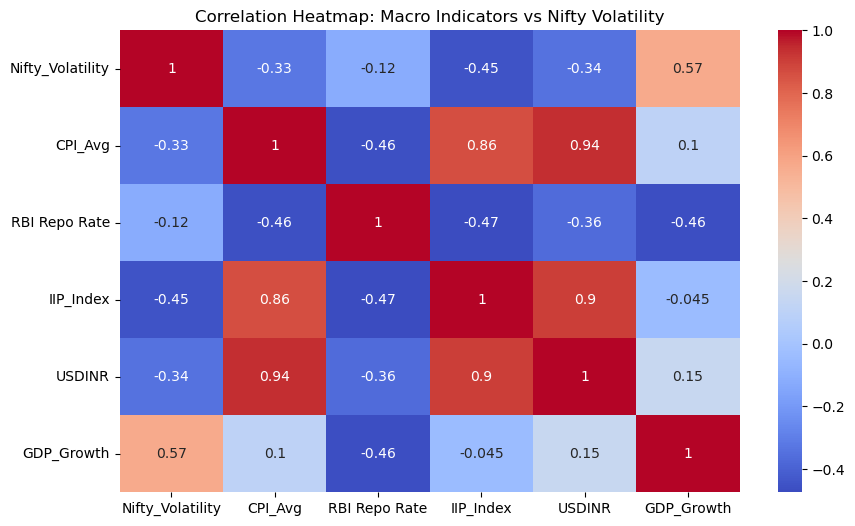

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_macro.drop(columns='Year').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Macro Indicators vs Nifty Volatility')
plt.show()


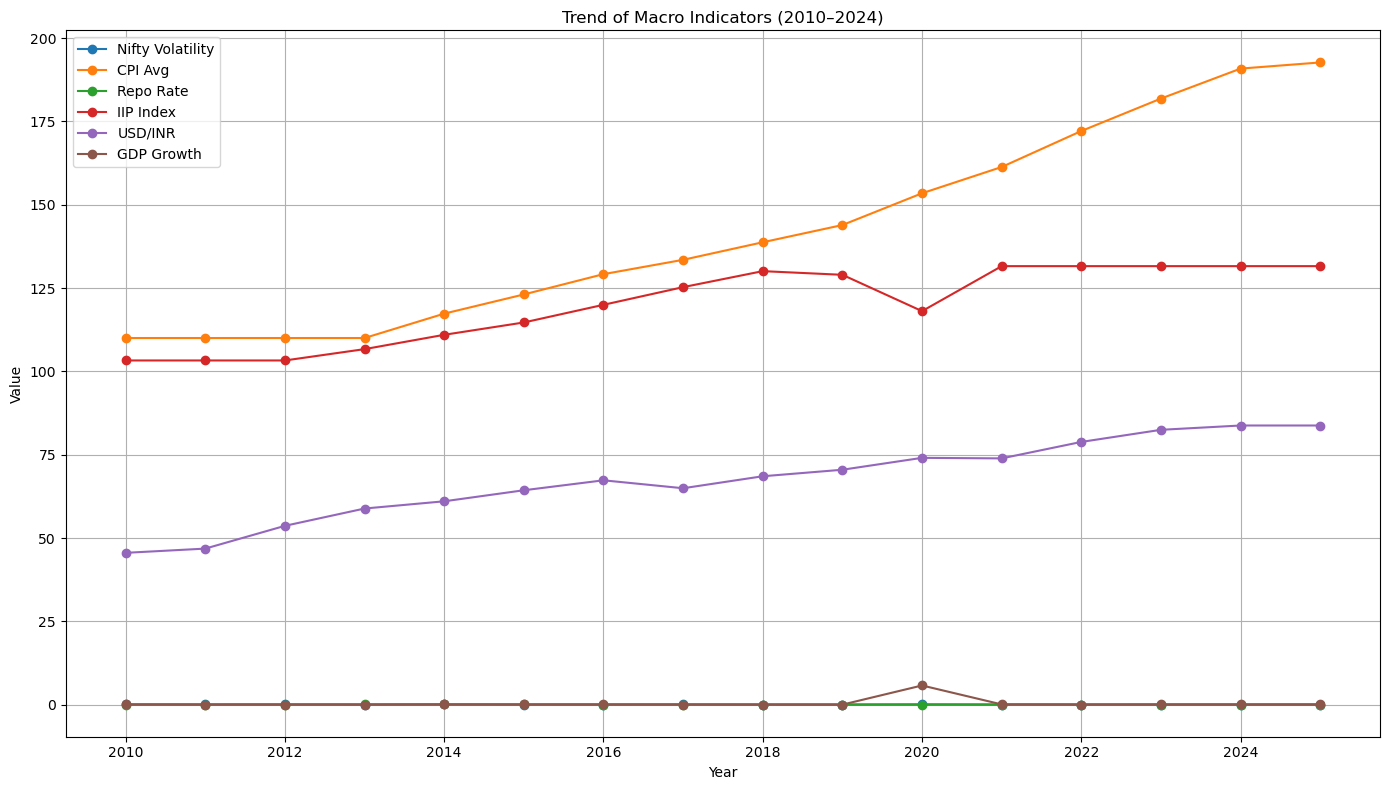

In [148]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 8))

# Plot all macro indicators over the years
plt.plot(df_macro['Year'], df_macro['Nifty_Volatility'], marker='o', label='Nifty Volatility')
plt.plot(df_macro['Year'], df_macro['CPI_Avg'], marker='o', label='CPI Avg')
plt.plot(df_macro['Year'], df_macro['RBI Repo Rate'], marker='o', label='Repo Rate')
plt.plot(df_macro['Year'], df_macro['IIP_Index'], marker='o', label='IIP Index')
plt.plot(df_macro['Year'], df_macro['USDINR'], marker='o', label='USD/INR')
plt.plot(df_macro['Year'], df_macro['GDP_Growth'], marker='o', label='GDP Growth')

# Labeling
plt.title('Trend of Macro Indicators (2010–2024)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


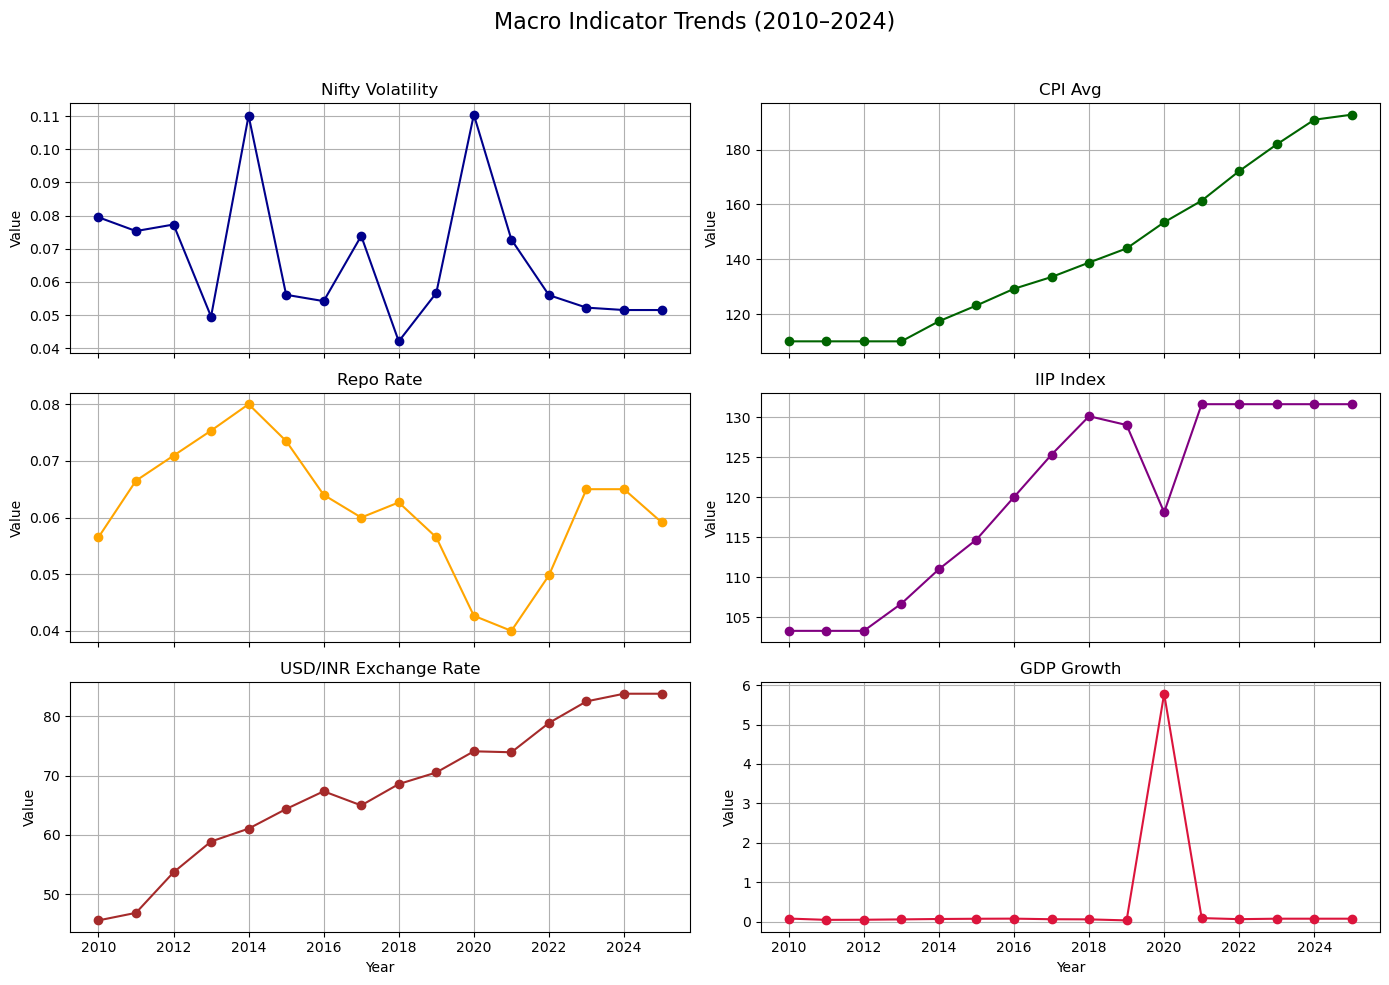

In [149]:
# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 10), sharex=True)

# Plot each variable separately
axs[0, 0].plot(df_macro['Year'], df_macro['Nifty_Volatility'], marker='o', color='darkblue')
axs[0, 0].set_title('Nifty Volatility')

axs[0, 1].plot(df_macro['Year'], df_macro['CPI_Avg'], marker='o', color='darkgreen')
axs[0, 1].set_title('CPI Avg')

axs[1, 0].plot(df_macro['Year'], df_macro['RBI Repo Rate'], marker='o', color='orange')
axs[1, 0].set_title('Repo Rate')

axs[1, 1].plot(df_macro['Year'], df_macro['IIP_Index'], marker='o', color='purple')
axs[1, 1].set_title('IIP Index')

axs[2, 0].plot(df_macro['Year'], df_macro['USDINR'], marker='o', color='brown')
axs[2, 0].set_title('USD/INR Exchange Rate')

axs[2, 1].plot(df_macro['Year'], df_macro['GDP_Growth'], marker='o', color='crimson')
axs[2, 1].set_title('GDP Growth')

# Set common labels
for ax in axs.flat:
    ax.set_ylabel('Value')
    ax.grid(True)

# Set X-axis label for bottom plots
for ax in axs[2]:
    ax.set_xlabel('Year')

plt.suptitle('Macro Indicator Trends (2010–2024)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


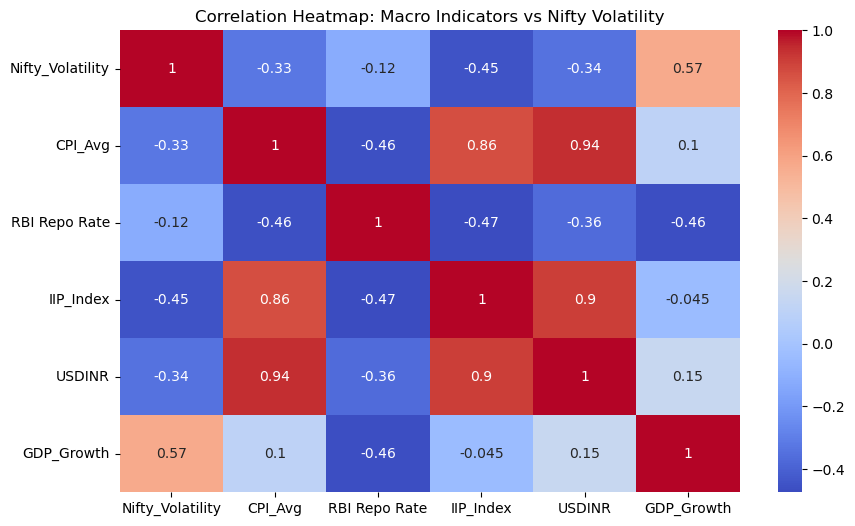

In [150]:
#CORRELATION ANALYSIS
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_macro.drop(columns='Year').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Macro Indicators vs Nifty Volatility')
plt.show()


In [151]:
#REGRESSION MODELLING (CORE ANALYTICAL INSIGHT)
#We want to see whether macro indicators can explain or predict NIFTY Volatility. We will use multiple regression.
#STEP 1: PREPARE DATA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Define X and y
X = df_macro[['CPI_Avg', 'RBI Repo Rate', 'IIP_Index', 'USDINR', 'GDP_Growth']]
y = df_macro['Nifty_Volatility']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [155]:
#STEP 2: TRAIN AND EVALUATE MODEL
# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

# Coefficients
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coeff_df)



R-squared: -2.3200388159278127
RMSE: 0.02186461705496265
         Feature  Coefficient
0        CPI_Avg     0.000828
1  RBI Repo Rate     0.210234
2      IIP_Index    -0.000007
3         USDINR    -0.003136
4     GDP_Growth     0.010250


C:\Users\Ashmita\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


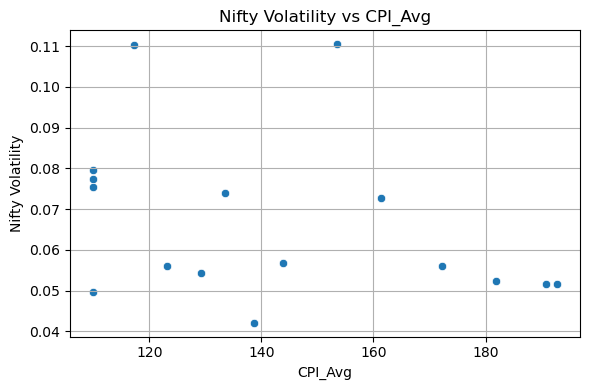

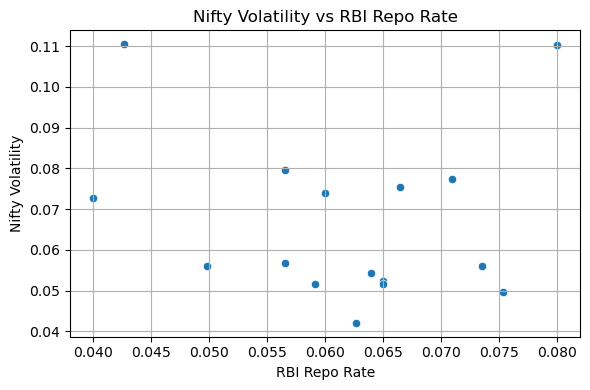

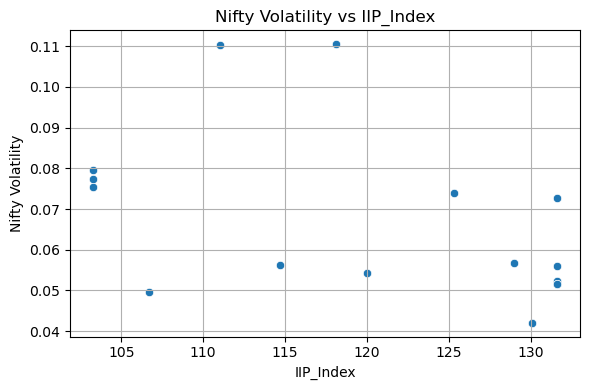

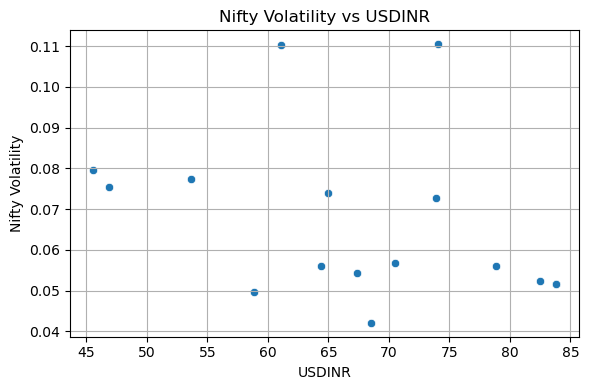

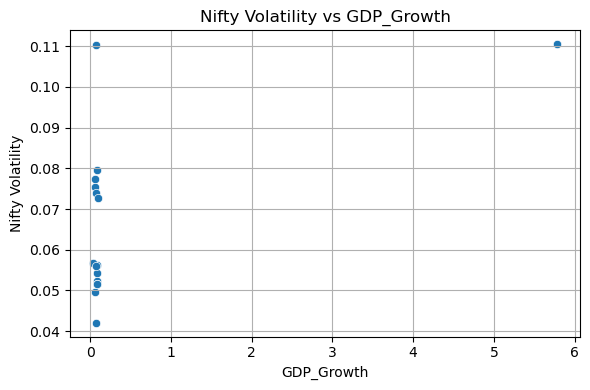

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

macro_vars = ['CPI_Avg', 'RBI Repo Rate', 'IIP_Index', 'USDINR', 'GDP_Growth']

for var in macro_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_macro, x=var, y='Nifty_Volatility')
    plt.title(f'Nifty Volatility vs {var}')
    plt.xlabel(var)
    plt.ylabel('Nifty Volatility')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
#📌 Conclusion
#This project explored the relationship between macroeconomic indicators and the volatility of the Nifty 50 index from 2010 onwards. Using annual data on variables such as CPI, repo rate, industrial production index (IIP), USD-INR exchange rate, and real GDP growth, the analysis included:

#Trend analysis through line charts

#Correlation heatmap

#Scatter plots to visualize relationships

#Linear regression to test explanatory power

#While preliminary findings suggested weak individual correlations, the regression model confirmed that these macroeconomic indicators alone could not robustly explain Nifty volatility (R² = -2.32). This highlights the limitations of small sample sizes and the complexity of financial market behavior, which may be influenced by additional variables like global events, investor sentiment, or fiscal policy.

#Future work could improve this model by:

#Using monthly or quarterly data

#Incorporating global market indicators

#Exploring machine learning methods for non-linear relationships

In [156]:
df_macro.to_csv('nifty_macro_dataset.csv', index=False)
